In [1]:
import pandas as pd

In [55]:
df = pd.read_csv('tweet_classifier.csv')
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [56]:
df.info(),df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


(None,
 Unnamed: 0            0
 count                 0
 hate_speech           0
 offensive_language    0
 neither               0
 class                 0
 tweet                 0
 dtype: int64)

In [57]:
import numpy as np
X = df.drop(columns = ["class","tweet"],axis=1)
X = np.array(X)
y = df["class"]
y = np.array(y)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini')
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [62]:
pred = DT.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred,y_test)
print("Accuracy:",accuracy)

Accuracy: 0.9997982650796853


In [20]:
df2 = pd.read_csv('drug200.csv')
df2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [21]:
df2.info(), df2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


(None,
 Age            0
 Sex            0
 BP             0
 Cholesterol    0
 Na_to_K        0
 Drug           0
 dtype: int64)

In [22]:
df2.duplicated().sum()

0

Sex
M    104
F     96
Name: count, dtype: int64


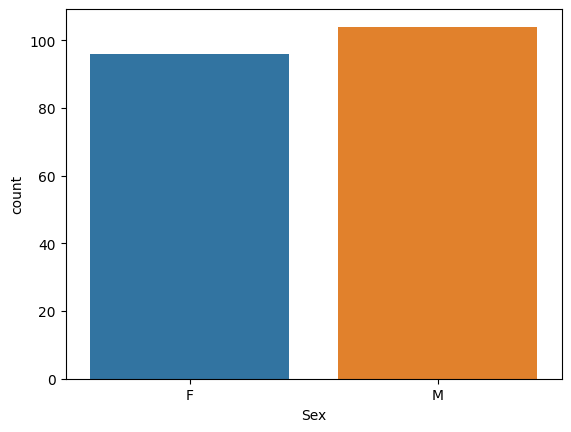

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
print(df2.Sex.value_counts())
sns.countplot(data=df2, x="Sex", hue="Sex")
plt.show()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


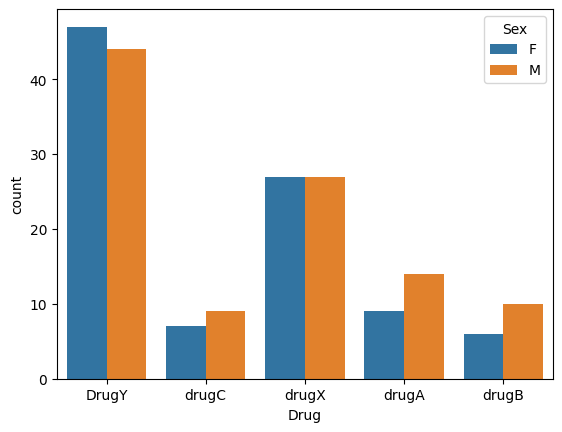

In [41]:
print(df2.Drug.value_counts())
sns.countplot(data=df2, x="Drug", hue="Sex")
plt.show()

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2["Cholesterol"] = le.fit_transform(df2["Cholesterol"])
df2["BP"] = le.fit_transform(df2["BP"])
df2["Sex"] = le.fit_transform(df2["Sex"])
df2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [54]:
from sklearn.model_selection import train_test_split
X2 = df2.drop(columns = ["Drug"])                     # or df.iloc[:,:-1]
y2 = df2["Drug"]                                      # or df.iloc[:,-1]
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state=42)

In [50]:
from sklearn.tree import DecisionTreeClassifier
DT2 = DecisionTreeClassifier()
DT2.fit(X2_train,y2_train)

DecisionTreeClassifier()

In [52]:
from sklearn.metrics import accuracy_score
pred2 = DT2.predict(X2_test)
accuracy = accuracy_score(pred2,y2_test)
print("Accuracy:",accuracy)

Accuracy: 1.0


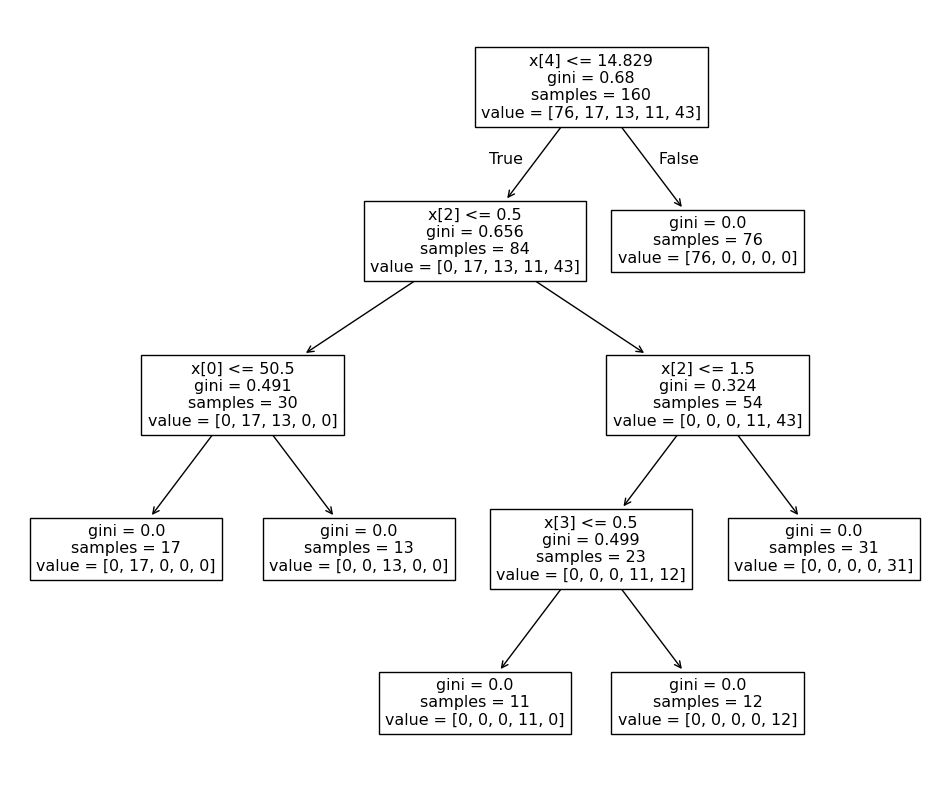

In [69]:
# The tree

from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(DT2.fit(X2_train,y2_train))
plt.show()

In [75]:
clf_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf_entropy.fit(X2_train,y2_train)
pred3 = clf_entropy.predict(X2_test)
accuracy = accuracy_score(pred3,y2_test)

0.875


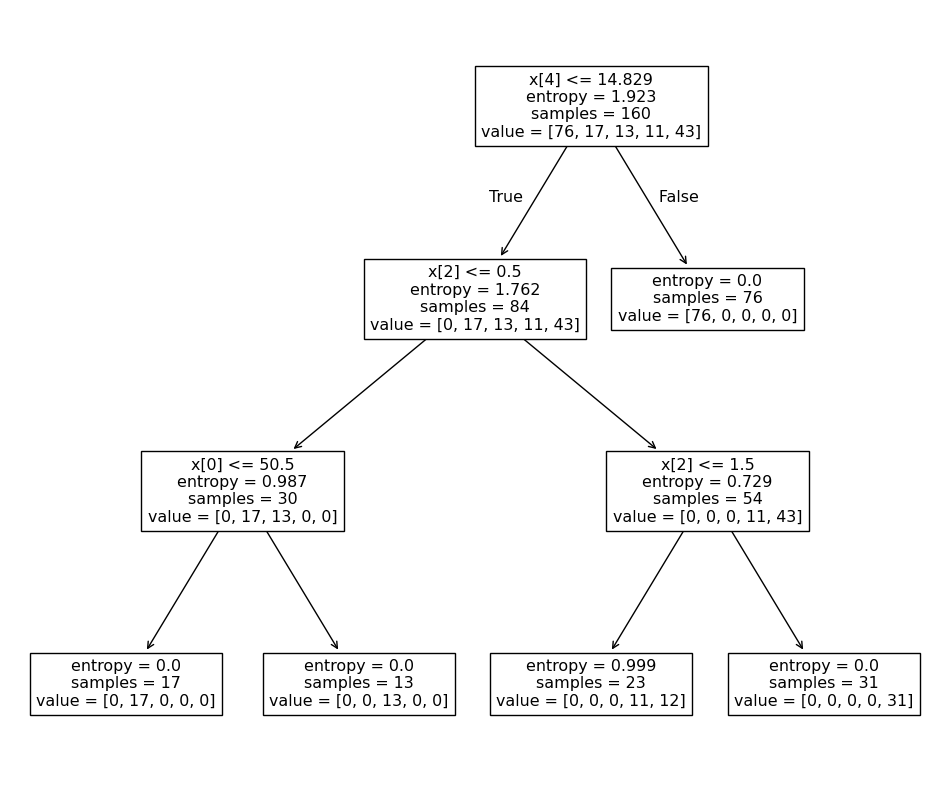

In [76]:
print(accuracy)
plt.figure(figsize=(12,10))
tree.plot_tree(clf_entropy.fit(X2_train,y2_train))
plt.show()